Implementations of simple greedy vs brute force algorithms both using edge lists

In [1]:
import time
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def addEdge(edge_list, vertex_1, vertex_2):
    edge_list[vertex_1].append(vertex_2) #adds vertex_2 to vertex_1s adjacencies
    edge_list[vertex_2].append(vertex_1) #adds vertex_1 to vertex_2s adjacencies

    return edge_list #returns the entire edge list

def greedy(edge_list):
    start_time = time.time()  # Note the start time
    colors = [-1] * len(edge_list)  # Array to hold the colors for each vertex
    available_colors = [False] * len(edge_list)  # Array to hold which colors are available for that vertex
    
    colors[0] = 0  # Assign the first vertex to the first color
    max_color = 0  # Initialize max color to 0 since we've colored the first vertex with color 0

    for vertex in range(1, len(edge_list)):
        for adjacent_vertex in edge_list[vertex]:
            if colors[adjacent_vertex] != -1:  # If the adjacent vertex has a color
                available_colors[colors[adjacent_vertex]] = True  # Mark that color as unavailable
        
        lowest_color = 0
        while lowest_color < len(edge_list) and available_colors[lowest_color]:
            lowest_color += 1

        colors[vertex] = lowest_color  # Color the current vertex with the found lowest color
        if lowest_color > max_color:
            max_color = lowest_color  # Update max_color if necessary
        
        available_colors = [False] * len(edge_list)  # Reset available colors for the next loop

    num_colors = max_color + 1  # Since color indices start at 0

    end_time = time.time()  # Note the end time
    # print(f"Greedy Algorithm. Runtime: {end_time - start_time:.6f} seconds. Number of Colors: {num_colors} colors.")
    # for vertex in range(len(edge_list)):
    #     print(f"Vertex {vertex} is colored {colors[vertex]}")
    
    color_dict = {vertex: color for vertex, color in enumerate(colors)}
    run_time = end_time - start_time
    return color_dict, run_time


In [3]:
def isValidColoring(edge_list, vertex_colors):
    for vertex in range(len(edge_list)):
        for adjacent_vertex in edge_list[vertex]:
            if vertex_colors[vertex] == vertex_colors[adjacent_vertex]:
                return False  # Adjacent vertices have the same color
    return True

def bruteForce(edge_list):
    start_time = time.time()  # Note the start time
    num_vertices = len(edge_list)
    num_colors = 1

    while True:  # Keep trying until a valid coloring is found
        all_vertex_colors = allPossibleColorings(edge_list, num_colors)
        
        for possible_coloring in all_vertex_colors:
            if isValidColoring(edge_list, possible_coloring):
                end_time = time.time()  # Note the end time
                # print(f"Brute Force Algorithm. Runtime: {end_time - start_time:.6f} seconds. Minimum Number of Colors (k): {num_colors} colors.")
                # for vertex in range(num_vertices):
                #     print(f"Vertex {vertex} is colored {possible_coloring[vertex]}")
                
                # Convert the list of vertex colors to a dictionary
                color_dict = {vertex: color for vertex, color in enumerate(possible_coloring)}
                run_time = end_time - start_time
                return color_dict, run_time
        
        num_colors += 1  # If no valid coloring was found, increase the number of colors
    

def allPossibleColorings(edge_list, num_colors):
    colors = [i for i in range(num_colors)]
    return list(itertools.product(colors, repeat=len(edge_list)))



In [4]:
def generate_random_graph(num_vertices, num_edges):    
    # Maximum possible edges for v vertices
    max_edges = num_vertices * (num_vertices - 1) // 2

    if num_edges > max_edges:
        raise ValueError(f"Cannot form {num_edges} edges with only {num_vertices} vertices. Maximum possible edges are {max_edges}.")
    
    edge_list = [[] for _ in range(num_vertices)]
    num_edges_in_list = 0

    while num_edges_in_list < num_edges:
        vertex1 = random.randint(0, num_vertices-1)
        vertex2 = random.randint(0, num_vertices-1)

        # Ensure no self-loops and no duplicate edges
        if vertex1 != vertex2 and vertex1 not in edge_list[vertex2]  and vertex2 not in edge_list[vertex1]:
            addEdge(edge_list, vertex1, vertex2)
            num_edges_in_list += 1
    
    return edge_list

def visualize_graphs(edge_list):
    G = nx.Graph()
    edges_as_tuples = [(i, neighbor) for i, neighbors in enumerate(edge_list) for neighbor in neighbors]
    G.add_edges_from(edges_as_tuples)

    color_palette_50 = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',  # red, green, yellow, blue, orange
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',  # purple, cyan, magenta, lime, pink
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',  # teal, lavender, brown, beige, maroon
    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',  # light green, olive, peach, navy, gray
    '#ffffff', '#000000', '#0a74da', '#6f2da8', '#008000',  # white, black, bright blue, indigo, dark green
    '#e0e0e0', '#d1e231', '#fabea7', '#ff7f00', '#ff0033',  # light gray, lime green, light peach, bright orange, bright red
    '#a1ca6d', '#673770', '#c1a1d3', '#d1e8e2', '#f9c1a2',  # olive green, dark purple, light purple, light cyan, light orange
    '#0d98ba', '#ffdb58', '#00468b', '#ff6fff', '#a4c639',  # turquoise, gold, dark blue, hot pink, green-yellow
    '#cd9575', '#665d1e', '#915c83', '#841b2d', '#faebd7'   # antique brass, golden brown, plum, ruby, antique white
    ]   

    brute_force_colors, brute_force_runtime = bruteForce(edge_list)
    greedy_colors, greedy_runtime = greedy(edge_list)

    # If greedy uses more colors than brute force, extend the palette
    max_colors = max(max(brute_force_colors.values()), max(greedy_colors.values())) + 1
    if len(color_palette_50) < max_colors:
        raise ValueError("The graph requires more colors than the provided color palette can offer.")

    # Map the colors to the vertices
    brute_force_node_colors = [color_palette_50[brute_force_colors[node]] for node in G.nodes()]
    greedy_node_colors = [color_palette_50[greedy_colors[node]] for node in G.nodes()]

    pos = nx.spring_layout(G)

    # Visualization
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    nx.draw(G, pos=pos, with_labels=True, node_color=greedy_node_colors, node_size=700, font_weight='bold')
    plt.title(f'Greedy Coloring ({len(set(greedy_node_colors))} colors, {greedy_runtime:.6f} runtime)')

    plt.subplot(1, 2, 2)
    nx.draw(G, pos=pos, with_labels=True, node_color=brute_force_node_colors, node_size=700, font_weight='bold')
    plt.title(f'Brute Force Coloring ({len(set(brute_force_node_colors))} colors, {brute_force_runtime:.6f} runtime)')

    plt.tight_layout()
    plt.show()



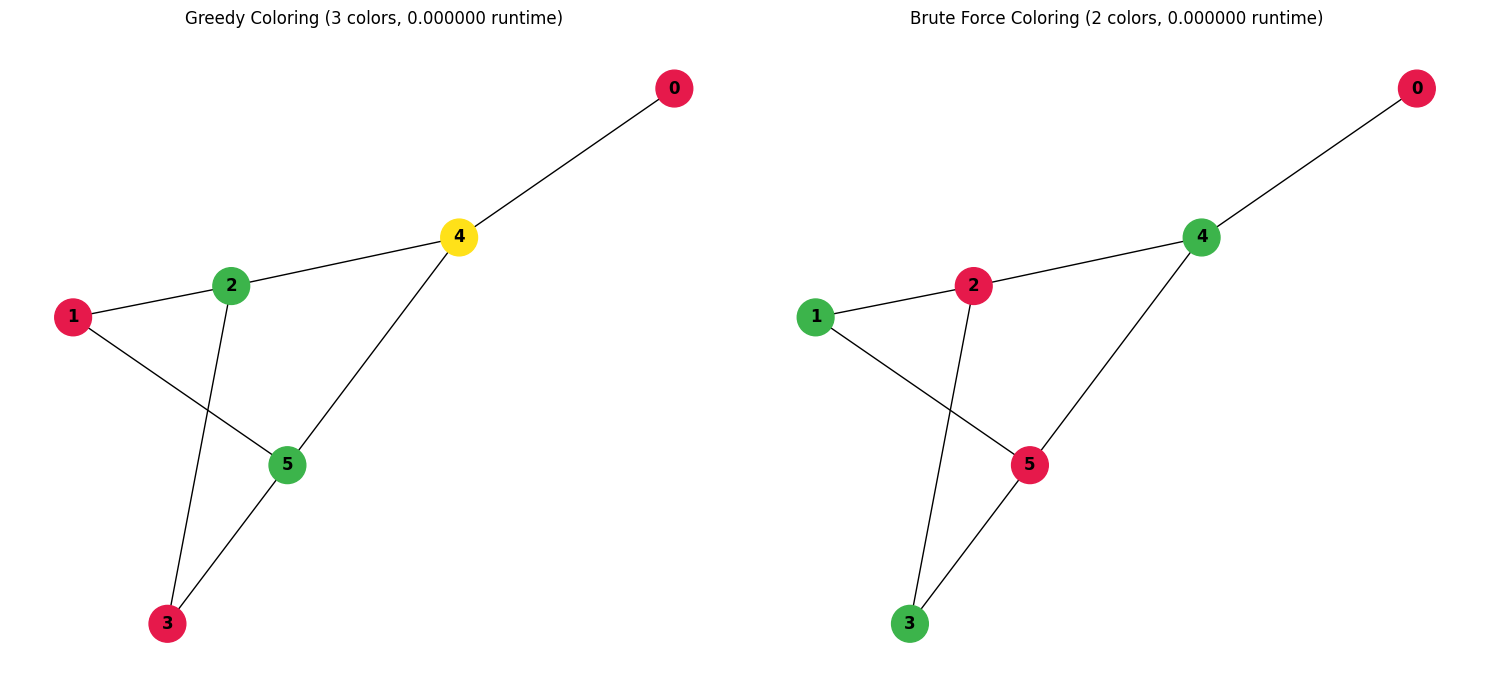

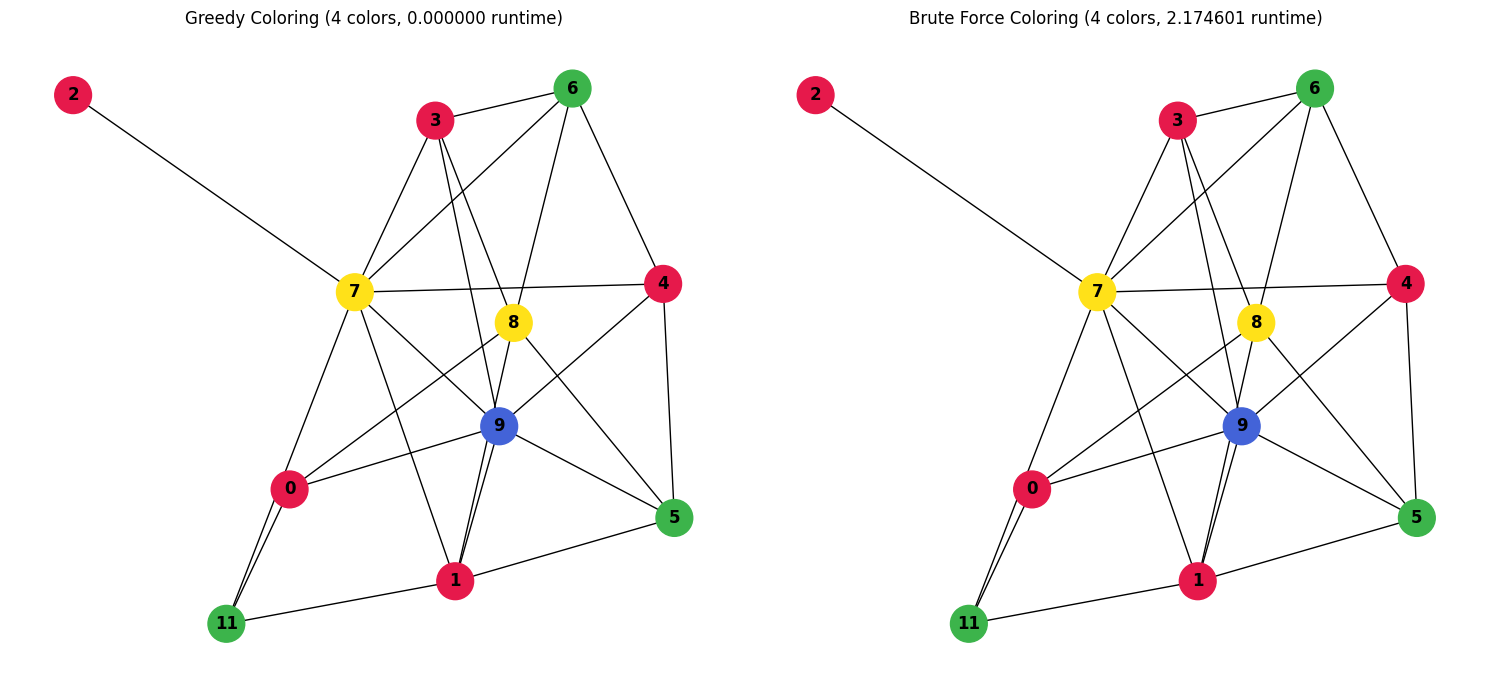

In [7]:
#Warning: Some graphs take forever to run due to brute force calculation. If it takes more than about 50 seconds, probably should just interrupt.
g1 = generate_random_graph(6, 7) #todo: add a way to save random graphs
g2 = generate_random_graph(12, 23)
visualize_graphs(g1)
visualize_graphs(g2) 
